/usr/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


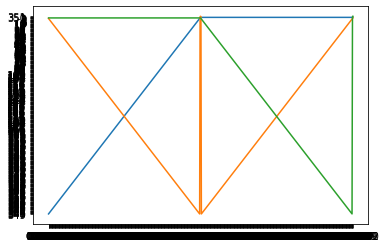

In [14]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

N = 350 #population size
T = 100.0 #max time

# float; start time
t = 0.0

# float; spatial parameter
V = 100.0

# float; rate of infection after contact
beta = 5.0 

# float; rate of cure
gamma = 0.5

# int; initial infected population
Y = 1

mu = 10e-4

#########################################

# compute susceptible population, set recovered to zero
X = N - Y
Z = 0

# initialize results list
SIR_data = []
SIR_data.append((t, X, Y, Z))

rate = np.zeros(6)

# main loop
while t < T:
    if Y == 0:
        break
  
    rate[0] = mu*N
    rate[1] = beta * X * Y / N
    rate[2] = gamma * Y
    rate[3] = mu*X
    rate[4] = mu*Y
    rate[5] = mu*Z
    
    dt = -math.log(random.uniform(0.0,1.0)) / np.sum(rate)
    t = t + dt
    
    if random.uniform(0.0,1.0) < rate[2] / rate[3]:
        X = X - 1
        Y = Y + 1
    else:
        Y = Y - 1
        Z = Z + 1

    SIR_data.append((t, X, Y, Z))

    with open('SIR_data.txt', 'w+') as fp:
        fp.write('\n'.join('%f %i %i %i' % x for x in SIR_data))
        
f = open("SIR_data.txt")
lines = f.readlines()
t, X, Y, Z = zip(*(line.split() for line in lines))
f.close()

plt.show()

plt.figure()
plt.plot(t,X)
plt.plot(t,Y)
plt.plot(t,Z)
plt.show()

